In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/findata-creditscoring/credit__sample.xls
/kaggle/input/findata-creditscoring/credit_train.xls
/kaggle/input/findata-creditscoring/credit_test.xls
/kaggle/input/findata-creditscoring/credit__sample.csv
/kaggle/input/findata-creditscoring/credit_test.csv
/kaggle/input/findata-creditscoring/credit_train.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go



# Train - загрузка, подготовка признаков, поиск выбросов,

In [3]:
train = pd.read_csv('/kaggle/input/findata-creditscoring/credit_train.csv', index_col = 'Loan ID')
train.head(3)


,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan ID,,,,,,,,,,,,,,,,,,
14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0


In [4]:
train.shape # (100000, 19)

(100000, 18)

In [5]:
# поменяем названия колонок для удобства
train_col = [] # для новых названий колонок
for i in train.columns:
    train_col.append(i.lower().replace(' ','_'))

train.columns = train_col # 
train.columns

Index(['customer_id', 'loan_status', 'current_loan_amount', 'term',
       'credit_score', 'annual_income', 'years_in_current_job',
       'home_ownership', 'purpose', 'monthly_debt', 'years_of_credit_history',
       'months_since_last_delinquent', 'number_of_open_accounts',
       'number_of_credit_problems', 'current_credit_balance',
       'maximum_open_credit', 'bankruptcies', 'tax_liens'],
      dtype='object')

In [6]:
train.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 14dd8831-6af5-400b-83ec-68e61888a048 to c63916c6-6d46-47a9-949a-51d09af4414f
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   customer_id                   100000 non-null  object 
 1   loan_status                   100000 non-null  object 
 2   current_loan_amount           100000 non-null  int64  
 3   term                          100000 non-null  object 
 4   credit_score                  80846 non-null   float64
 5   annual_income                 80846 non-null   float64
 6   years_in_current_job          95778 non-null   object 
 7   home_ownership                100000 non-null  object 
 8   purpose                       100000 non-null  object 
 9   monthly_debt                  100000 non-null  float64
 10  years_of_credit_history       100000 non-null  float64
 11  months_since_last_delinquent  46859 non-null

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10ef376990>,
      dtype=object)

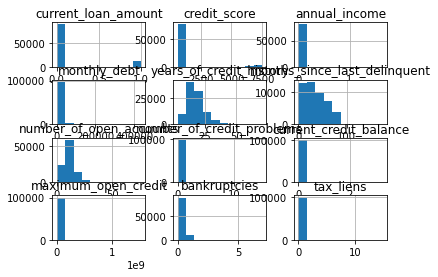

In [7]:
train.iloc[:,1:].hist() # распределения значений у признаков

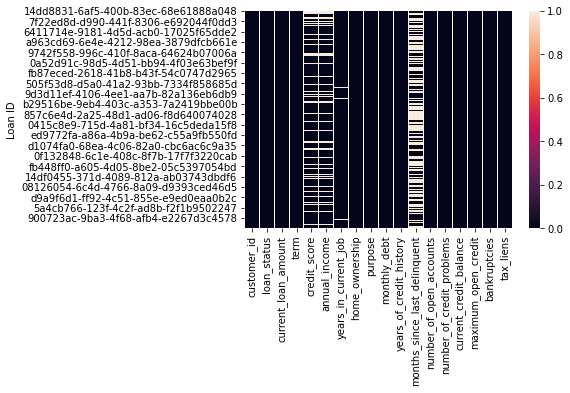

In [8]:
sns.heatmap(train.isnull()) # много ли пропущенных значений

## Подготовка признаков

### Проверю каждый признак подробно, уберу пропущенные значения, проверю есть ли выбросы и т.д.

In [9]:
train.head(3)

,customer_id,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
Loan ID,,,,,,,,,,,,,,,,,,
14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0


### 1./2. - loan_id - идентификатор кредита / customer_id - идентификатор клиента 

In [10]:
print('уникальных customer_id из 100000 \t -', train.customer_id.nunique())

# значит они повторяются в списке
train.customer_id.value_counts()
train[train['customer_id'] == '2db1550c-00c5-400e-8dee-923f1871ccc2'] # пример, повторяются все значения
# надо их удалить

уникальных customer_id из 100000 	 - 81999


,customer_id,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
Loan ID,,,,,,,,,,,,,,,,,,
9b730d39-a970-44ba-bbe1-ed3186e5f211,2db1550c-00c5-400e-8dee-923f1871ccc2,Fully Paid,119592,Short Term,712.0,352621.0,10+ years,Rent,Debt Consolidation,7640.09,17.0,NaN,10,0,165452,409354.0,0.0,0.0
9b730d39-a970-44ba-bbe1-ed3186e5f211,2db1550c-00c5-400e-8dee-923f1871ccc2,Fully Paid,119592,Short Term,712.0,352621.0,10+ years,Rent,Debt Consolidation,7640.09,17.0,NaN,10,0,165452,409354.0,0.0,0.0


In [11]:
train[train.customer_id.duplicated()].shape # кол-во дубликатов (18001, 20)
train = train.drop_duplicates() # удалили дубликаты
train.shape # после удаления дубликатов - (89785, 19)

(89785, 18)

In [12]:
#  осталось дубликатов
train[train.customer_id.duplicated()].shape # кол-во дубликатов (7786, 19)

(7786, 18)

In [13]:
# либо удалим эти столбцы
#train = train.drop(columns=['loan_id','customer_id'])
train = train.drop(columns=['customer_id'])

# либо изменим тип данных на категориальный
#train.loan_id = train.loan_id.astype('category')
#train.customer_id = train.customer_id.astype('category')

train.head(3)


,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
Loan ID,,,,,,,,,,,,,,,,,
14dd8831-6af5-400b-83ec-68e61888a048,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
4771cc26-131a-45db-b5aa-537ea4ba5342,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0


### 3. loan_status - будет таргетом , разбор ниже

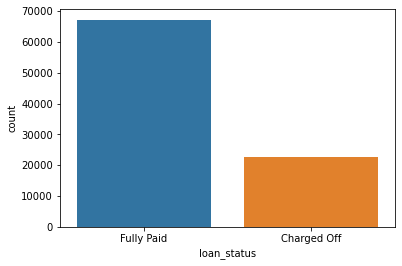

In [14]:
sns.countplot(train.loan_status) # распределение таргета

### 4. current_loan_amount - размер кредита

In [15]:
train.current_loan_amount.describe()

count    8.978500e+04
mean     1.306089e+07
std      3.329556e+07
min      1.080200e+04
25%      1.802680e+05
50%      3.138740e+05
75%      5.323780e+05
max      1.000000e+08
Name: current_loan_amount, dtype: float64

размеров кредита - 22004


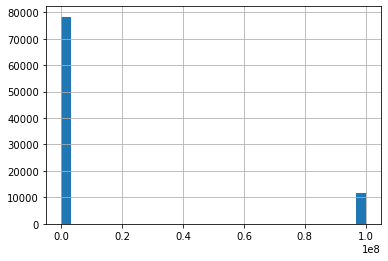

In [16]:
train.current_loan_amount.hist(bins=30)
print('размеров кредита -', train['current_loan_amount'].nunique()) # кол-во значений 


In [17]:
train.current_loan_amount.value_counts() # кол-во кредитов по размеру

99999999    11484
216194         24
223652         24
223322         24
223102         23
            ...  
366938          1
645458          1
719158          1
579722          1
401412          1
Name: current_loan_amount, Length: 22004, dtype: int64

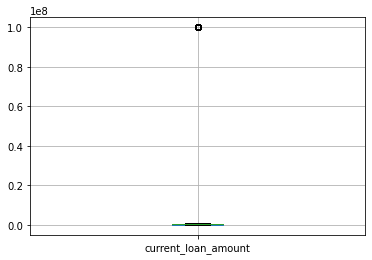

In [18]:
# есть ли выбросы
train.boxplot(column= ['current_loan_amount'])

### 5. Term - срок кредита

,loan_status,current_loan_amount,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,term_1
Loan ID,,,,,,,,,,,,,,,,,
14dd8831-6af5-400b-83ec-68e61888a048,Fully Paid,445412,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0,1
4771cc26-131a-45db-b5aa-537ea4ba5342,Fully Paid,262328,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0,1
4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,Fully Paid,99999999,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0,1


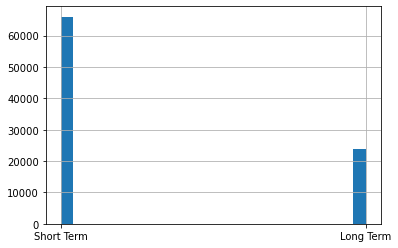

In [19]:
train.term.hist(bins= 25)
# short - короткий срок кредита, long  - длинный
train['term_1'] = np.where(train.term == 'Short Term', 1, 0) # заменяем
train = train.drop(columns = ['term']) # удалим не нужное уже
train.head(3)

### 6. credit_score - кредитный рейтинг

count    70631.000000
mean      1130.830598
std       1571.037395
min        585.000000
25%        708.000000
50%        729.000000
75%        742.000000
max       7510.000000
Name: credit_score, dtype: float64

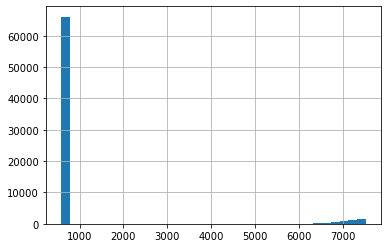

In [20]:
train.credit_score.hist(bins= 35)
#train.credit_score.value_counts().sum() # 80846 значений
train.credit_score.describe()

In [21]:
train.query("credit_score == 7510")['credit_score'].count() # кол-во макс.значений
# не выбросы

9

In [22]:
# заменим НАН на медиану
nan_tr1 = train.credit_score.isna().sum() / len(train) # NaN - 0.19154
print('NaN - {}%'.format(nan_tr1 * 100))
median_cred_score = train.credit_score.median()
print('median_cred_score-', median_cred_score)
#train.credit_score.value_counts()

NaN - 21.333184830428245%
median_cred_score- 729.0


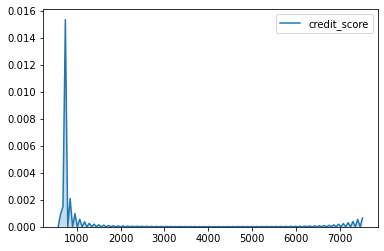

In [23]:
# распределение данных у признака - разные способы 
#train.credit_score.hist(bins=25)
#sns.distplot(train.credit_score) # график распределения и гистограмма
sns.kdeplot(train.credit_score, shade=True) # график распределения 

In [24]:
# заменим НАН на медиану
train.credit_score = train.credit_score.fillna(median_cred_score)
#train.credit_score.fillna(train_cred_score_median, inplace=True) # замена на месте
train.credit_score.isna().sum() / len(train) # NaN - 0.0
try:
    (train.credit_score.isna().sum() / len(train)) == 0 # NaN -  0.0
    print('credit_score - заменили NaN')
except:
    print('credit_score - не получилось заменить NaN')

credit_score - заменили NaN


### 7. annual_income - годовой доход 

In [25]:
nan_tr2 = train.annual_income.isna().sum() / len(train) # NaN -  0.19154
print('NaN - {}%'.format(nan_tr2 * 100))

# заменим NaN на медиану
median_annual_income = train.annual_income.median()
#print('median_annual_income - ', median_annual_income)
train.annual_income.fillna(median_annual_income, inplace=True) # замена на месте


NaN - 21.333184830428245%


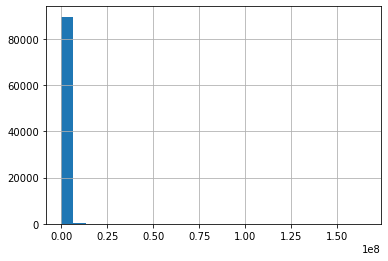

In [26]:
train.annual_income.hist(bins= 25)
#train.annual_income.value_counts()

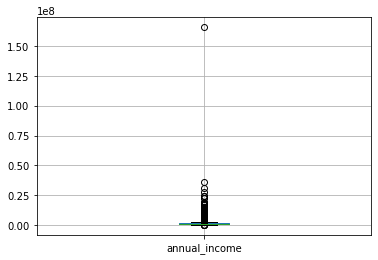

In [27]:
train.boxplot(column= ['annual_income'])
# выбросы есть

In [28]:
train.annual_income.describe()

count    8.978500e+04
mean     1.331752e+06
std      9.835986e+05
min      7.662700e+04
25%      9.379350e+05
50%      1.168975e+06
75%      1.495680e+06
max      1.655574e+08
Name: annual_income, dtype: float64

165557393.0
8


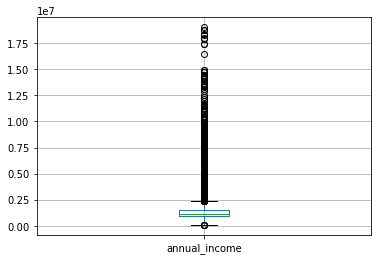

In [29]:
# уберем выбросы
print(train.annual_income.max())
print(train.query("annual_income > 20000000")['annual_income'].count()) # 7шт
t_in2 = train.query("annual_income > 20000000").index # 
train = train.drop(index =t_in2, axis= 0)

train.boxplot(column= ['annual_income'])
# выбросы еще остались

### 8. years_in_current_job - кол-во лет кредитной истории

(89777,)
['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' nan '6 years']
NAN- 3802


10+ years    27751
2 years       8253
< 1 year      7364
3 years       7339
5 years       6135
1 year        5832
4 years       5511
6 years       5133
7 years       4989
8 years       4121
9 years       3547
Name: years_in_current_job, dtype: int64

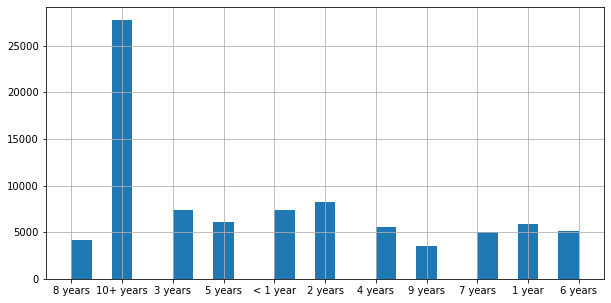

In [30]:
print(train.years_in_current_job.shape) # 100000
plt.figure(figsize= [10,5])
train.years_in_current_job.hist(bins= 25)
print(train.years_in_current_job.unique())
print('NAN-', train.years_in_current_job.isna().sum())
train.years_in_current_job.value_counts().count() # 11 значений
train.years_in_current_job.value_counts()

In [31]:
# сначала заменить НАН на 10+ years - самое распространенное значение
train.years_in_current_job = train.years_in_current_job.fillna('10+ years')
print('NAN-', train.years_in_current_job.isna().sum())


NAN- 0


In [32]:
# сделаем бинарное кодирование в итоге
def replace_years(elem):
    """ ф. изменяет значения кол-ва лет кредитной истории на числа
    """
    if '+' in elem:
        elem = 10
    elif '< ' in elem:
        elem = 0.5               
    elif 'year' in elem:
        elem = elem.replace(' years','').replace(' year', '') # уберем из значений 'year'
    return float(elem)
#train['years_in_current_job_1'] = train.years_in_current_job.apply(replace_years)
#print(train.years_in_current_job_1.unique())
#train.head(3)

### 9. home_ownership - статус недвижимости

In [33]:
train.home_ownership.describe()

count             89777
unique                4
top       Home Mortgage
freq              43544
Name: home_ownership, dtype: object

NAN - 0


Home Mortgage    43544
Rent             37853
Own Home          8197
HaveMortgage       183
Name: home_ownership, dtype: int64

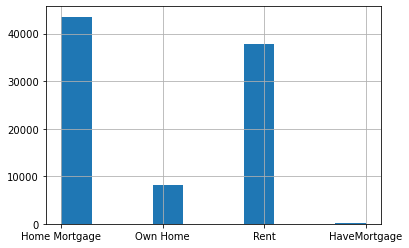

In [34]:
train.home_ownership.hist()
print('NAN -', train.home_ownership.isna().sum())
train.home_ownership.value_counts()

In [35]:
# потом заменим - бинарное

### 10. purpose - цель кредита

In [36]:
train.purpose.describe()

count                  89777
unique                    16
top       Debt Consolidation
freq                   70827
Name: purpose, dtype: object

NAN -  0


Debt Consolidation      70827
Home Improvements        5237
other                    5234
Other                    2882
Business Loan            1366
Buy a Car                1165
Medical Bills             983
Buy House                 582
Take a Trip               488
major_purchase            330
small_business            255
moving                    135
wedding                   105
Educational Expenses       91
vacation                   89
renewable_energy            8
Name: purpose, dtype: int64

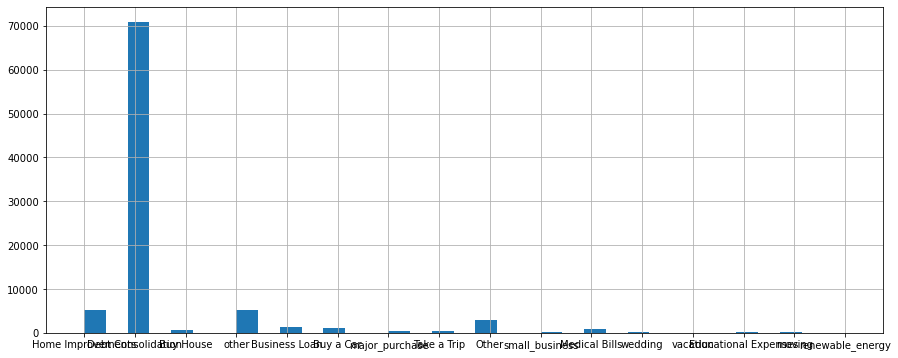

In [37]:
# категорийные данные 
plt.figure(figsize= [15,6])
train.purpose.hist(bins= 35)
print('NAN - ', train.purpose.isna().sum())
train.purpose.value_counts()

In [38]:
# заменим на бинарное / сделаю 2 значения - самое распростр. и остальные

#  хотя можно все значения переделать с get_dummies()

train['purpose_1'] = np.where(train.purpose == 'Debt Consolidation', 1, 0) # заменяем
train = train.drop(columns= ['purpose']) # удалим

### 11. monthly_debt - ежемесячный платеж по кредиту

In [39]:
print(train.monthly_debt.describe())
train.query("monthly_debt > 22000")['monthly_debt'].count()
# вроде не выбросы

count     89777.000000
mean      18391.427727
std       12061.879524
min           0.000000
25%       10157.590000
50%       16140.500000
75%       23918.910000
max      229057.920000
Name: monthly_debt, dtype: float64


26989

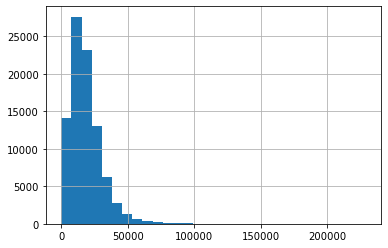

In [40]:
train.monthly_debt.hist(bins= 30)
#train.monthly_debt.isna().sum() # 0
#train.monthly_debt.value_counts()

In [41]:
#sns.boxplot(column= ['monthly_debt'])

### 12. months_since_last_delinquent - количество месяцев с последнего нарушения условий кредита

In [42]:
train.months_since_last_delinquent.describe()

count    41446.000000
mean        34.976668
std         22.008816
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: months_since_last_delinquent, dtype: float64

32.0


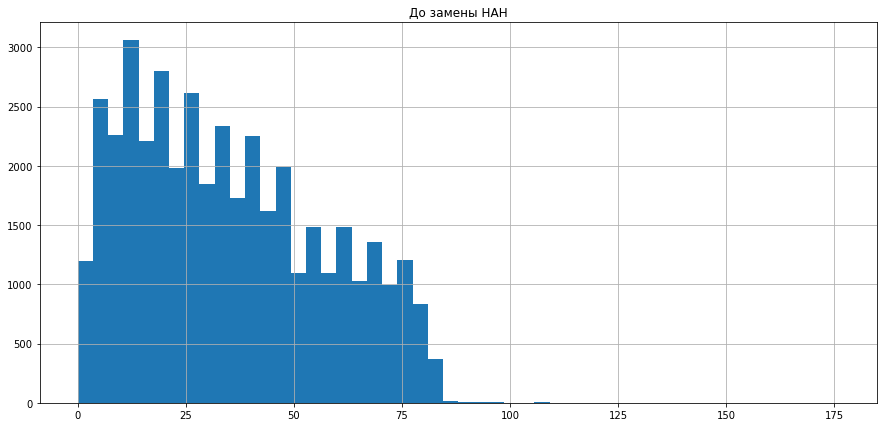

In [43]:
plt.figure(figsize= [15,7])
train.months_since_last_delinquent.hist(bins= 50) # до замены НАН
plt.title('До замены НАН')
train.months_since_last_delinquent.value_counts()

t_m_s_d_median = train.months_since_last_delinquent.median()
print(t_m_s_d_median)

NaN - 48331
34.97666843603725


Text(0.5, 1.0, 'После замены НАН')

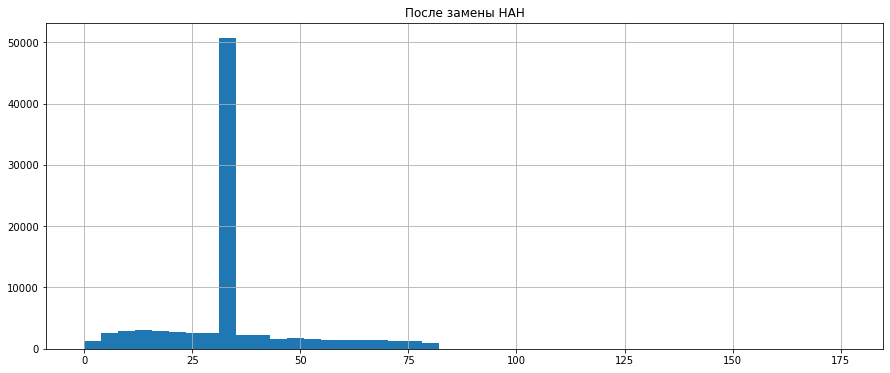

In [44]:
print('NaN -', train.months_since_last_delinquent.isna().sum()) # 48331
t_m_s_d_mean = train.months_since_last_delinquent.mean()
print(t_m_s_d_mean)
train.months_since_last_delinquent = train.months_since_last_delinquent.fillna(t_m_s_d_mean)
plt.figure(figsize= [15,6])
train.months_since_last_delinquent.hist(bins=45)
plt.title('После замены НАН')

In [45]:
# уменьшим значения признака
t_m_sum = train.months_since_last_delinquent.sum()
train['months_since_last_delinquent_1'] = train.months_since_last_delinquent.apply(lambda x: x / t_m_sum)
train = train.drop(columns= ['months_since_last_delinquent'])
train.head(3)

,loan_status,current_loan_amount,credit_score,annual_income,years_in_current_job,home_ownership,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,term_1,purpose_1,months_since_last_delinquent_1
Loan ID,,,,,,,,,,,,,,,,,
14dd8831-6af5-400b-83ec-68e61888a048,Fully Paid,445412,709.0,1167493.0,8 years,Home Mortgage,5214.74,17.2,6,1,228190,416746.0,1.0,0.0,1,0,0.000011
4771cc26-131a-45db-b5aa-537ea4ba5342,Fully Paid,262328,729.0,1168975.0,10+ years,Home Mortgage,33295.98,21.1,35,0,229976,850784.0,0.0,0.0,1,1,0.000003
4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,Fully Paid,99999999,741.0,2231892.0,8 years,Own Home,29200.53,14.9,18,1,297996,750090.0,0.0,0.0,1,1,0.000009


In [46]:
# удалю эту колонку - значения слишком выделяются из всех полсе замены
train = train.drop(columns= ['months_since_last_delinquent_1']) 

### 13. number_of_open_accounts - кол-во открытых кредитных карт

In [47]:
train.number_of_open_accounts.describe()

count    89777.000000
mean        11.123261
std          4.998808
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         76.000000
Name: number_of_open_accounts, dtype: float64

array([ 6, 35, 18,  9, 15, 13,  4, 20, 16, 23, 10,  8,  7, 12, 17,  5, 14,
       11, 34, 22, 19,  2, 32, 21,  3, 25, 28, 24, 43,  1, 30, 27, 26, 36,
       31, 29, 45, 37, 33, 38, 40, 41, 47, 48, 39,  0, 56, 42, 44, 52, 76])

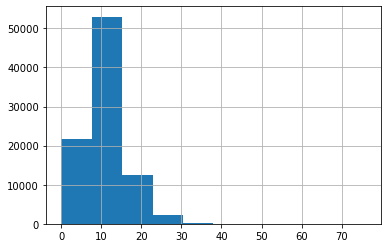

In [48]:
train.number_of_open_accounts.hist()
train.number_of_open_accounts.nunique() # 51
train.number_of_open_accounts.unique() # 

### 14. current_credit_balance - суммарный текущий долг

count    8.977700e+04
mean     2.940146e+05
std      3.722120e+05
min      0.000000e+00
25%      1.129170e+05
50%      2.097220e+05
75%      3.675170e+05
max      3.287897e+07
Name: current_credit_balance, dtype: float64


0          526
175978      15
137807      15
106039      14
148846      14
          ... 
466108       1
330942       1
707826       1
3344         1
1057559      1
Name: current_credit_balance, Length: 32728, dtype: int64

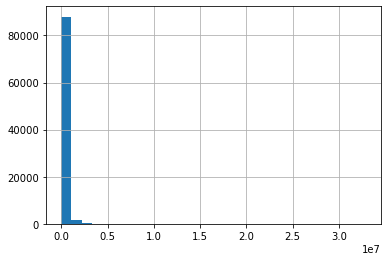

In [49]:
train.current_credit_balance.hist(bins= 30)
train.current_credit_balance.nunique() # 31382
print(train.current_credit_balance.describe())
train.current_credit_balance.value_counts()

In [50]:
# список индексов значений больше 10000000 - 4шт / это не выбросы / удалять не станем


### 15. maximum_open_credit - максимальный кредитный лимит из всех источников

count    8.977500e+04
mean     7.756376e+05
std      8.803908e+06
min      0.000000e+00
25%      2.770680e+05
50%      4.726700e+05
75%      7.914280e+05
max      1.539738e+09
Name: maximum_open_credit, dtype: float64


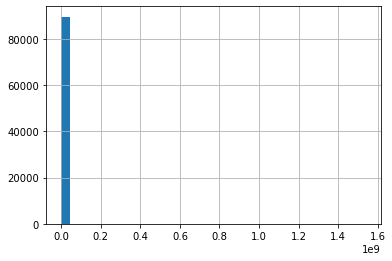

In [51]:
print(train.maximum_open_credit.describe())
train.maximum_open_credit.hist(bins= 35)

In [52]:
# скорее всего это выбросы  - удалим

#train.query("maximum_open_credit > 1000000000").index # 3
#train.query("maximum_open_credit > 100000000").index  # 16
#train.query("maximum_open_credit > 10000000").index  # 218
#train.query("maximum_open_credit > 1000000").index  # 14315
q3 = train.query("maximum_open_credit > 10000000").index 
len(q3) # 235

235

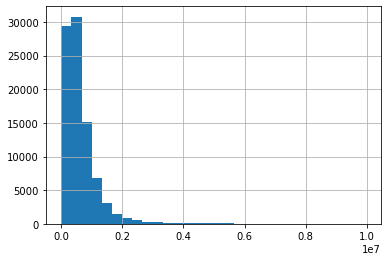

In [53]:
# удалим эти строки
train = train.drop(index= q3)
train.maximum_open_credit.describe()
train.maximum_open_credit.hist(bins=30)

In [54]:
train[train.maximum_open_credit.isna() == True].maximum_open_credit

Loan ID
b798f46b-e27b-4823-af83-294b1ffc3490   NaN
e42ae1f7-74b5-46d7-95ce-46a88918ba12   NaN
Name: maximum_open_credit, dtype: float64

In [55]:
t_O_c_median = train.maximum_open_credit.median()
train.maximum_open_credit = train.maximum_open_credit.fillna(t_O_c_median)

### 16. bankruptcies - количество банкротств

count    89356.000000
mean         0.115806
std          0.348263
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: bankruptcies, dtype: float64


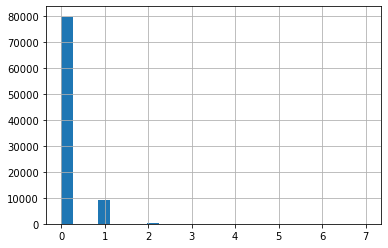

In [56]:
print(train.bankruptcies.describe())
train.bankruptcies.hist(bins=25)

In [57]:
len(train) - train.bankruptcies.isna().count()# 0 / # 89542
train[train.bankruptcies.isna() == True].bankruptcies

Loan ID
b74992dc-dc85-45f4-b260-3d2045d25cdc   NaN
80530120-aee3-48d4-97b7-f6c74c60da73   NaN
a6d1e549-cacf-4386-a18b-b96be66cfa70   NaN
0b525b55-c30f-4daf-a991-57242a469b24   NaN
da088d9d-3724-4224-9dd4-4d628e970084   NaN
                                        ..
92f73633-944c-4162-b68b-0f54a8b57f65   NaN
ccc0a04d-90fd-4ce2-89a6-823a4dfd41c8   NaN
e13004e1-01ef-4601-936e-868e130b0d64   NaN
2e26ec26-651a-4481-a76f-bbbab88ed77a   NaN
e6ce8a3a-0842-471c-ba97-0221f203613c   NaN
Name: bankruptcies, Length: 186, dtype: float64

In [58]:
train.bankruptcies.unique()

array([ 1.,  0.,  2.,  3., nan,  5.,  4.,  7.,  6.])

In [59]:
print(train.bankruptcies.median())
train.bankruptcies = train.bankruptcies.fillna(0)

0.0


In [60]:
train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 89542 entries, 14dd8831-6af5-400b-83ec-68e61888a048 to c63916c6-6d46-47a9-949a-51d09af4414f
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_status                89542 non-null  object 
 1   current_loan_amount        89542 non-null  int64  
 2   credit_score               89542 non-null  float64
 3   annual_income              89542 non-null  float64
 4   years_in_current_job       89542 non-null  object 
 5   home_ownership             89542 non-null  object 
 6   monthly_debt               89542 non-null  float64
 7   years_of_credit_history    89542 non-null  float64
 8   number_of_open_accounts    89542 non-null  int64  
 9   number_of_credit_problems  89542 non-null  int64  
 10  current_credit_balance     89542 non-null  int64  
 11  maximum_open_credit        89542 non-null  float64
 12  bankruptcies               89542 non-null

### 17. tax_liens - количество нарушений налогового законодательства

count    89534.000000
mean         0.028604
std          0.255041
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: tax_liens, dtype: float64

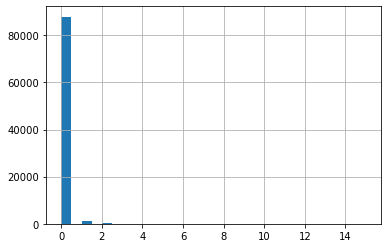

In [61]:
train.tax_liens.hist(bins=30)
train.tax_liens.describe()

In [62]:
train.tax_liens[train.tax_liens.isna() == True]

Loan ID
62eb07d6-2042-4e7e-92e5-c64e5c5e550f   NaN
bb27f262-7982-4478-9d85-768ecca4fb88   NaN
8a2eb784-0682-4314-bb93-daa50a7c7c99   NaN
3a17105b-d1f5-460c-a582-829153486728   NaN
96e9fc0f-ff00-4526-85ee-a62b904d9db6   NaN
8d5a40cc-230c-45f8-91f1-3c3afa7bb97f   NaN
8f6af143-49e2-4fff-b729-8a2be6bf71a3   NaN
bb27f262-7982-4478-9d85-768ecca4fb88   NaN
Name: tax_liens, dtype: float64

In [63]:
train.tax_liens.median() # 0
train.tax_liens = train.tax_liens.fillna(0)

### Train - итог после чистки

In [64]:
train.head(3)

,loan_status,current_loan_amount,credit_score,annual_income,years_in_current_job,home_ownership,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,term_1,purpose_1
Loan ID,,,,,,,,,,,,,,,,
14dd8831-6af5-400b-83ec-68e61888a048,Fully Paid,445412,709.0,1167493.0,8 years,Home Mortgage,5214.74,17.2,6,1,228190,416746.0,1.0,0.0,1,0
4771cc26-131a-45db-b5aa-537ea4ba5342,Fully Paid,262328,729.0,1168975.0,10+ years,Home Mortgage,33295.98,21.1,35,0,229976,850784.0,0.0,0.0,1,1
4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,Fully Paid,99999999,741.0,2231892.0,8 years,Own Home,29200.53,14.9,18,1,297996,750090.0,0.0,0.0,1,1


In [65]:
train.shape

(89542, 16)

In [66]:
# бинарное кодирование 
train = pd.get_dummies(train, columns= ['years_in_current_job', 'home_ownership'])
train.shape

(89542, 29)

## Target 

Fully Paid     0.74756
Charged Off    0.25244
Name: loan_status, dtype: float64

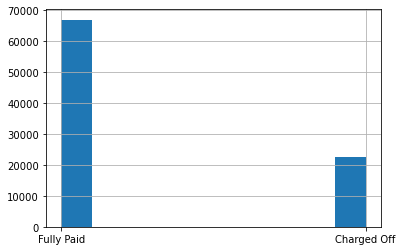

In [67]:
train.loan_status.hist()
train.loan_status.value_counts(normalize= True)

In [68]:
# значений "кредит погашен" в 3 раза больше чем "не погашен"

In [69]:
#train['loan_status_1'] = np.where(train.loan_status == 'Fully Paid', 1, 0)
#train = train.drop(columns=['loan_status'])
# train.rename(columns={'loan_status_1':'loan_status'})
# что то не переименовывается

train.head(3)

,loan_status,current_loan_amount,credit_score,annual_income,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,...,years_in_current_job_5 years,years_in_current_job_6 years,years_in_current_job_7 years,years_in_current_job_8 years,years_in_current_job_9 years,years_in_current_job_< 1 year,home_ownership_HaveMortgage,home_ownership_Home Mortgage,home_ownership_Own Home,home_ownership_Rent
Loan ID,,,,,,,,,,,,,,,,,,,,,
14dd8831-6af5-400b-83ec-68e61888a048,Fully Paid,445412,709.0,1167493.0,5214.74,17.2,6,1,228190,416746.0,...,0,0,0,1,0,0,0,1,0,0
4771cc26-131a-45db-b5aa-537ea4ba5342,Fully Paid,262328,729.0,1168975.0,33295.98,21.1,35,0,229976,850784.0,...,0,0,0,0,0,0,0,1,0,0
4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,Fully Paid,99999999,741.0,2231892.0,29200.53,14.9,18,1,297996,750090.0,...,0,0,0,1,0,0,0,0,1,0


In [70]:
train.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Index: 89542 entries, 14dd8831-6af5-400b-83ec-68e61888a048 to c63916c6-6d46-47a9-949a-51d09af4414f
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_status                     89542 non-null  object 
 1   current_loan_amount             89542 non-null  int64  
 2   credit_score                    89542 non-null  float64
 3   annual_income                   89542 non-null  float64
 4   monthly_debt                    89542 non-null  float64
 5   years_of_credit_history         89542 non-null  float64
 6   number_of_open_accounts         89542 non-null  int64  
 7   number_of_credit_problems       89542 non-null  int64  
 8   current_credit_balance          89542 non-null  int64  
 9   maximum_open_credit             89542 non-null  float64
 10  bankruptcies                    89542 non-null  float64
 11  tax_liens                       

# Test - загрузка, подготовка признаков

In [71]:
test = pd.read_csv('/kaggle/input/findata-creditscoring/credit_test.csv', index_col = 'Loan ID')
test.shape # (10000, 18)


(10000, 17)

In [72]:
# заменим названия колонок
test_col = [] # для новых названий колонок
for i in test.columns:
    test_col.append(i.lower().replace(' ','_'))
    
test.columns = test_col
test.head(3)

,customer_id,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
Loan ID,,,,,,,,,,,,,,,,,
f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9,0,621908,1058970,0.0,0.0
6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11,0,679573,904442,0.0,0.0
f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10,0,38532,388036,0.0,0.0


In [73]:
test.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, f738779f-c726-40dc-92cf-689d73af533d to 14f94b64-26c4-48fd-b916-1388d7adcc1d
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   10000 non-null  object 
 1   current_loan_amount           10000 non-null  int64  
 2   term                          10000 non-null  object 
 3   credit_score                  8019 non-null   float64
 4   annual_income                 8019 non-null   float64
 5   years_in_current_job          9573 non-null   object 
 6   home_ownership                10000 non-null  object 
 7   purpose                       10000 non-null  object 
 8   monthly_debt                  10000 non-null  float64
 9   years_of_credit_history       10000 non-null  float64
 10  months_since_last_delinquent  4694 non-null   float64
 11  number_of_open_accounts       10000 non-null  int64  
 12 

In [74]:
test.index

Index(['f738779f-c726-40dc-92cf-689d73af533d',
       '6dcc0947-164d-476c-a1de-3ae7283dde0a',
       'f7744d01-894b-49c3-8777-fc6431a2cff1',
       '83721ffb-b99a-4a0f-aea5-ef472a138b41',
       '08f3789f-5714-4b10-929d-e1527ab5e5a3',
       'a4957169-d809-44cc-847b-975400bc8d11',
       '43467302-94fe-494b-b52f-3fd891fea71c',
       '930c7cb3-6086-434a-9547-3ed41c181552',
       '0b2f1b66-741e-4e37-a929-99926cdc9e9a',
       'd08f3a5e-93df-40e7-bdd8-cba59180bddf',
       ...
       '91e26ead-810b-44a0-892f-d623e1e444a0',
       '0594e01c-4230-4280-8267-78cd0c46f720',
       '4d0d0e65-e9aa-43e4-8de0-8aa2869a9983',
       '6f0b1e02-d222-4227-9161-b0c4fff4dd76',
       'a2701102-3cb0-46a6-8658-e6f20d950182',
       'c4ab66f9-833c-43b8-879c-4f8bcb64dd14',
       'bbd3a392-01b4-4e0e-9c28-b2a4a39beac7',
       'da9870de-4280-46a3-8fc6-91cfe5bfde9d',
       '0cc8e0e0-1bc6-49d7-ad0f-0598b647458f',
       '14f94b64-26c4-48fd-b916-1388d7adcc1d'],
      dtype='object', name='Loan ID', length=100

In [75]:
# подготовка test
#
test['term_1'] = np.where(test.term == 'Short Term', 1, 0)  # на бинарное
#
median_cred_score_test = test.credit_score.median() # 
test.credit_score = test.credit_score.fillna(median_cred_score_test) #заменим на медиану
#
median_annual_income = test.annual_income.median()
test.annual_income = test.annual_income.fillna(median_annual_income) # заменим на медиану
#
test.years_in_current_job = test.years_in_current_job.fillna('10+ years') 
# заменим на самое распространенное
#
test['purpose_1'] = np.where(test.purpose == 'Debt Consolidation', 1, 0) # на бинарное
#
#test['months_since_last_delinquent_1'] = test.months_since_last_delinquent.\
#                                                            apply(lambda x: x / t_m_sum)
#
test.bankruptcies = test.bankruptcies.fillna(0)
#
t_O_c_median = test.maximum_open_credit.median()
test.maximum_open_credit = test.maximum_open_credit.fillna(t_O_c_median)
#
test.tax_liens = test.tax_liens.fillna(0)
#

# loan_status - данной колонки нет

# либо удалим эти столбцы
#test = test.drop(columns=['loan_id','customer_id'])
test = test.drop(columns=['customer_id'])
# либо изменим тип данных на категориальный
#test.loan_id = test.loan_id.astype('category')
#test.customer_id = test.customer_id.astype('category')

#
test = test.drop(columns = ['term', 'purpose', 'months_since_last_delinquent'])
#train = train.drop(columns=['loan_id','customer_id'])

# удалим не нужное уже / 1 вариант

#test = test.drop(['term'], axis= 1) # удалим не нужное уже / 2 вариант

In [76]:
# бинарное кодирование
test = pd.get_dummies(test, columns= ['years_in_current_job', 'home_ownership'])

In [77]:
test.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, f738779f-c726-40dc-92cf-689d73af533d to 14f94b64-26c4-48fd-b916-1388d7adcc1d
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   current_loan_amount             10000 non-null  int64  
 1   credit_score                    10000 non-null  float64
 2   annual_income                   10000 non-null  float64
 3   monthly_debt                    10000 non-null  float64
 4   years_of_credit_history         10000 non-null  float64
 5   number_of_open_accounts         10000 non-null  int64  
 6   number_of_credit_problems       10000 non-null  int64  
 7   current_credit_balance          10000 non-null  int64  
 8   maximum_open_credit             10000 non-null  int64  
 9   bankruptcies                    10000 non-null  float64
 10  tax_liens                       10000 non-null  float64
 11  term_1                          

# Predict - выбор моделей

In [78]:
X = train.drop(columns=['loan_status'])
y = train.loan_status

In [79]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression     # проверил
from sklearn.linear_model import SGDClassifier          # проверил
from sklearn.preprocessing import StandardScaler        # проверил
from sklearn.tree import DecisionTreeClassifier         # проверил
from sklearn.ensemble import RandomForestClassifier     # проверил пока лучше
from sklearn.ensemble import GradientBoostingClassifier # проверил

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### Разобьем на тренировочную и валидационную выборки

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)#, stratify= y)
# stratify - для несбалансированного таргета

# создадим массив куда буду складывать значения score и названия классификаторов
# а потом можно будет глянуть на графике какой классификатор лучше оценивает модель
M_score = []
M_classif = []

## Логистическая регрессия - LogisticRegression

In [81]:
clf_log_regr = LogisticRegression(random_state= 42)
clf_log_regr.fit(X_train, y_train) # обучим модель
# если сделать индексом колонку - не хочет
# если удалить обе колонки - считает - 0,79
# с категор типом - не хочет
# если категор в индекс , а другую колонку удалить - 0,79
#clf_log_regr.get_params() # посмотреть все параметры классификатора
clf_log_regr_pred = clf_log_regr.predict(X_test) # предскажем 
clf_log_regr_pred_1 = clf_log_regr.predict_proba(X_test)# найдем вероятности принадлежности к классу
clf_log_regr.score(X_test, y_test) # 0.7933263393008224

0.7933263393008224

In [82]:
# попробуем посчитать со стандартизированными данными StandardScaler

scaler = StandardScaler()                        #определяем класс стандартизации
X_train_scaler = scaler.fit_transform(X_train)   # стандартизируем трейн
X_test_scaler = scaler.transform(X_test)         # стандартизируем тест
clf_log_regr_scaler = LogisticRegression()       # классификатор
clf_log_regr_scaler.fit(X_train_scaler, y_train) # обучим модель
clf_log_regr_scaler.predict(X_test_scaler)       # предскажем
score_scaler = clf_log_regr_scaler.score(X_test_scaler, y_test)
print(score_scaler)                              # 0.7987410741480253
M_score.append(score_scaler)
M_classif.append('LogisticRegression') # 0.7971504957866594



0.7971504957866594


## SGDClassifier

In [83]:
clf_SGD = SGDClassifier(random_state= 42) 
clf_SGD.fit(X_train, y_train)                   # clf.fit(tr, y)
sgd_pred = clf_SGD.predict(X_test)              # clf.predict(tes)
clf_SGD_score = clf_SGD.score(X_test, y_test) # clf.score(tr, y)    -  0.6831130298534829
print(clf_SGD_score)
M_score.append(clf_SGD_score)
M_classif.append('SGD') # 0.7909573928051711

0.7909573928051711


## DecisionTreeClassifier

In [84]:
clf_decis_tree = DecisionTreeClassifier(random_state= 42)
#clf_decis_tree.get_params()
clf_decis_tree.fit(X_train, y_train)
clf_decis_tree_pred = clf_decis_tree.predict(X_test)

score = clf_decis_tree_score = clf_decis_tree.score(X_test, y_test)
print(score)                      #
M_score.append(clf_decis_tree_score)
M_classif.append('DecisionTree') # 0.7112931063656976

0.7112931063656976


## RandomForestClassifier

In [123]:
# 1 вариант - без настроек
clf_rand_forest = RandomForestClassifier(random_state= 42, class_weight= 'balanced_subsample')
#                                          class_weight= 'balanced_subsample' - если несбалансирован таргет

clf_rand_forest.get_params()
clf_rand_forest.fit(X_train,y_train)
clf_rand_forest.predict(X_test)
score = clf_rand_forest.score(X_test, y_test)
print(score) # 
M_score.append(score)
M_classif.append('RandomForest') # 0.7968120748587093 / на Kaggle 0.81933 /
#после введения class_weight='balanced_subsample' 0.81966
#после удаления stratify из разбивки трейна и теста / на Kaggle - 0.82233

0.7995194422823108


### Посмотрим вклад каждого признака , построим график значимости признаков

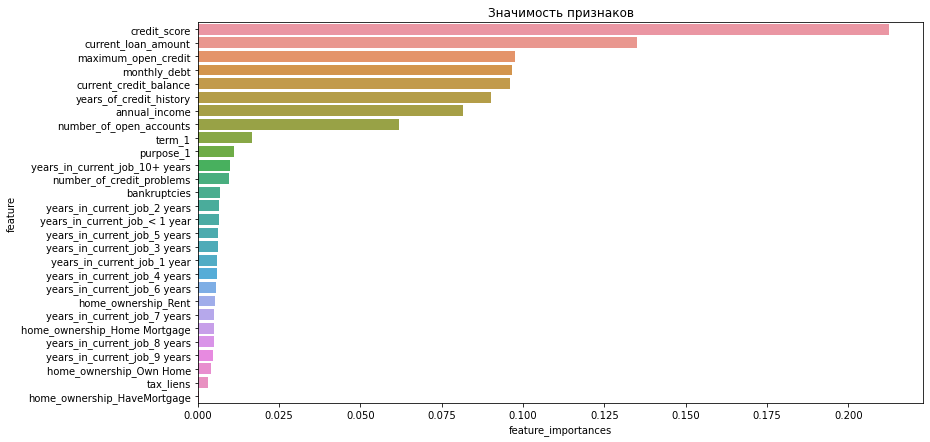

In [86]:
# признаки с лучшим вкладом 
feature_importances = clf_rand_forest.feature_importances_
feature_importances_df = pd.DataFrame({'feature':X_test.columns, 
                                       'feature_importances':feature_importances})
data_feature = feature_importances_df.sort_values('feature_importances',
                                   ascending=False) # отсорируем по значению
plt.figure(figsize=[13,7])
plt.title('Значимость признаков')
sns.barplot(x= 'feature_importances', y= 'feature', data= data_feature)

In [107]:
# вариант Scaler / попробуем посчитать со стандартизированными данными StandardScaler

#scaler = StandardScaler()                      #определяем класс стандартизации
#X_train_scaler = scaler.fit_transform(X_train) # стандартизируем трейн
#X_test_scaler = scaler.transform(X_test)       # стандартизируем тест

#clf_rand_forest_scaler = RandomForestClassifier(random_state= 42)
#clf_rand_forest_scaler.fit(X_train_scaler, y_train)
#clf_rand_forest_scaler.predict(X_test_scaler)
#clf_rand_forest_scaler.score(X_test_scaler, y_test) 
# 0.7970151274154794     - a на Кагле вышел ответ 0.50066
# поэтому Scaler применять не станем

0.7970151274154794

In [110]:
# 2 вариант - поиск лучших параметров 
#gr_search_clf_rand_forest = GridSearchCV(clf_rand_forest, params, cv= 5)
#gr_search_clf_rand_forest.fit(X_train, y_train)
#gr_search_clf_rand_forest.best_params_
#print(gr_search_clf_rand_forest.best_params_)
# params = {'n_estimators': range(1,300, 50),\
#          'min_samples_split': range(1,5),\
#          'min_samples_leaf': range(1,5),\
#          'max_depth': range(1,5)}
#clf_rand_forest = RandomForestClassifier(n_estimators= 1\
#                                         , max_depth= 1\
#                                         , min_samples_leaf=1\
#                                         , min_samples_split= 2\
#                                         , random_state= 42)
#clf_rand_forest.fit(X_train,y_train)
#clf_rand_forest.predict(X_test)
#clf_rand_forest.score(X_test, y_test) #0.7974889167146096 / на Кагле после вставки - stratify  0.81833 / до этого было 0,822
#params = {'n_estimators': range(1,10)} # {'n_estimators': 1}


0.7974889167146096

In [89]:
# может улучшит модель  PCA 

## GradientBoostingClassifier 

In [90]:
# 1 вариант - гиперпараметры по умолчанию
clf_grad_boost = GradientBoostingClassifier(random_state= 42, learning_rate= 0.01)
clf_grad_boost.fit(X_train, y_train)
clf_grad_boost.predict(X_test)
score_scaler = clf_grad_boost.score(X_test, y_test)
print(score_scaler)
# сбор данных для графика
M_score.append(score_scaler)
M_classif.append('GradientBoosting') # 0.7974889167146096

0.7974889167146096


In [100]:
# 2 вариант - найдем лучшие параметры
#clf_grad_boost_best = GradientBoostingClassifier(random_state= 42,\
#                                            learning_rate= 0.01,\
#                                            max_depth= 2,\
#                                            min_samples_leaf= 2,\
#                                            min_samples_split= 2,\
#                                            n_estimators= 203)
#clf_grad_boost_best.fit(X_train, y_train)
#clf_grad_boost_best.predict(X_test)
#clf_grad_boost_best.score(X_test, y_test) # 0.7974889167146096 / на Kaggle - 0.81833

0.7974889167146096

In [113]:
# 3 вариант - с применением Scaler
#scaler = StandardScaler()                      #определяем класс стандартизации
#clf_grad_boost_scaler = GradientBoostingClassifier(random_state= 42, learning_rate= 0.01)
#X_train_scaler = scaler.fit_transform(X_train) # стандартизируем трейн
#X_test_scaler = scaler.transform(X_test)       # стандартизируем тест
#
#clf_grad_boost_scaler.fit(X_train_scaler, y_train)
#clf_grad_boost_scaler.predict(X_test_scaler)
#clf_grad_boost_scaler.score(X_test_scaler, y_test) # 0.7974889167146096 / на Kaggle 0.22500 )))

0.7974889167146096

### График значения score разных классификаторов

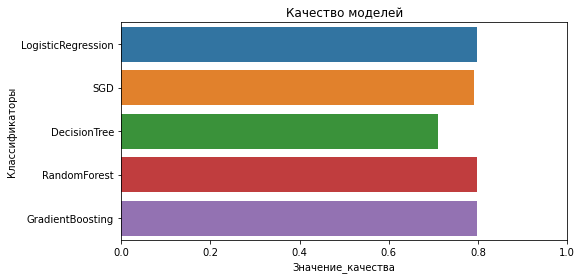

In [93]:
M = pd.DataFrame(list(zip(M_score, M_classif)), columns=['Значение_качества', 'Классификаторы'])
plt.figure(figsize=(8,4))
plt.xlim(0, 1)
plt.title('Качество моделей')
sns.barplot(x= 'Значение_качества', y = 'Классификаторы', data= M)
#sns.catplot(x= 'value', y = 'classificator', data= M, kind='bar')

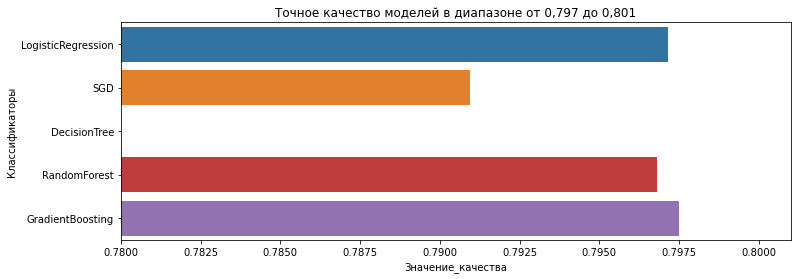

In [94]:
# посмотреть точнее где значение больше
plt.figure(figsize=(12,4))
plt.xlim(0.78,0.801)
plt.title('Точное качество моделей в диапазоне от 0,797 до 0,801')
sns.barplot(x= 'Значение_качества', y = 'Классификаторы', data= M)

### y_pred - предсказанная величина

In [124]:
#y_pred = classifikator.predict(test) 
#y_pred = clf_log_regr_scaler.predict(test)  # 0.77500
#y_pred = clf_decis_tree.predict(test) # 0.75233
#y_pred = clf_rand_forest_scaler.predict(test) # 0.50066
#y_pred = clf_rand_forest.predict(test) # 0.82200
#y_pred = clf_grad_boost.predict(test) # 0.0.81866
#y_pred = clf_grad_boost.predict(test) # learning rate 0.01 / 0.81833 
#y_pred = clf_grad_boost_best.predict(test) # 0.81833
#y_pred = clf_grad_boost_scaler.predict(test) # 0.22500
#y_pred = clf_rand_forest.predict(test) # 0.81966
y_pred = clf_rand_forest.predict(test) # 0.82233


# Submit загрузка, подготовка 

In [96]:
submit = pd.read_csv('/kaggle/input/findata-creditscoring/credit__sample.csv')

In [125]:
output = pd.DataFrame({'Loan ID':test.index, 'Loan Status':y_pred})
output.to_csv('my_submission.csv', index=False)
print('+++')

+++
